# **0. Imports and settings**

In [1]:
import requests
import pandas as pd
import calendar

# Google Drive
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

# web scraping
from bs4 import BeautifulSoup
import re
import time

import json

# pandas settings
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 200)

Mounted at /content/drive


# **1. Web Scraping**

In [ ]:
base_url = "https://www.trustpilot.com/review/lightyear.com" # 1727 reviews 73 pages
headers = {'User-Agent': 'Mozilla/5.0'}

reviews = []
page = 1
while True:
    print(f'Scraping page {page}...')
    page_url = f"{base_url}?page={page}"
    resp = requests.get(page_url, headers=headers)
    soup = BeautifulSoup(resp.content, 'html.parser')

    # find all review cards
    review_cards = soup.find_all('div', class_="styles_cardWrapper__g8amG")
    if not review_cards:
        print('No more reviews found. Stopping.')
        break

    for card in review_cards:
        # name = card.find("span", attrs={"data-consumer-name-typography": "true"})
        country = card.find("span", attrs={"data-consumer-country-typography": "true"})
        date_rev = card.find("time")
        rate = card.find("div", attrs={"data-service-review-rating": True})
        review_title = card.find("h2", attrs={"data-service-review-title-typography": "true"})
        review = card.find("p", attrs={"data-service-review-text-typography": "true"})

        reviews.append({
            # "name": name.text.strip() if name else None,
            "country": country.text.strip() if country else None,
            "date_rev": date_rev['datetime'] if date_rev and date_rev.has_attr('datetime') else (date_rev.text.strip() if date_rev else None),
            "rate": rate['data-service-review-rating'] if rate and rate.has_attr('data-service-review-rating') else None,
            "review_title": review_title.text.strip() if review_title else None,
            "review": review.text.strip() if review else None
        })
    page += 1
    time.sleep(1)  # avoid getting blocked

df = pd.DataFrame(reviews)

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Scraping 

In [ ]:
df.shape # 1441 from 1727 are scraped

(1441, 5)

In [ ]:
df.head()

,country,date_rev,rate,review_title,review
0,EE,2025-08-27T12:47:07.000Z,4,It simple and does what it must do.,None
1,EE,2025-08-26T22:11:39.000Z,5,Low fees,"Low fees, easy to use"
2,ES,2025-08-26T13:44:26.000Z,5,All perfect great at all,"All perfect great at all, hope its protected by european polices."
3,EE,2025-08-26T13:05:07.000Z,5,supper easy,None
4,IE,2025-08-26T03:39:54.000Z,5,Easy to use and everything you do is…,Easy to use and everything you do is well illustrated


In [ ]:
df.tail()

,country,date_rev,rate,review_title,review
1436,GB,2021-10-21T11:15:04.000Z,5,Very slick looking app and a decent…,"Very slick looking app and a decent investment universe to choose from. Onboarding was also very smooth.One of the best features is the multi-currency account, which I sometimes use for FX (free until up to 3k/month)"
1437,GB,2021-10-21T09:22:11.000Z,4,New investing app with great rates on currency exchange,"Lightyear is a new stock trading and investment service. At present only US stocks are offered and only market orders. However, I expect developments. At present there is only a phone app. They say a web platform will come. At present there is only a general investment account. No ISA or SIPP.Like some other new investing platforms there is no commission on stock trades. The main feature that distinguishes Lightyear from competitors is their offer of no fee currency exchange at interbank rates. This applies to the first £3000 per month (above that the fee is 0.35%). You can have USD, GBP and EUR accounts, exchange money between them, and transfer money in and out of these without fee. Transfer in current happens after a few hours the same day. Transfer out takes 3-5 business days.I have successfully started positions in two US companies that I do not already hold on other platforms. The process was quick and accurate. The app is easy to use. Pricing is clear. However, as a UK taxpayer it would be useful if the contract notes or activity reports were to include a note of the GBP/USD rate at the time of the trade, so that I can keep track of my taxable GBP cost basis and profit.My emails to customer support have been answered rapidly and clearly.I give 4* on promise and my early experience of this start-up. I hope continuing development will show that 4* is deserved and that eventually 5* will be warranted. I look forward to watching how things develop."
1438,GB,2021-10-21T09:10:19.000Z,4,Compelling US shares broker app,Nice interface. Easy to use. Great customer support. So far very compelling US shares trading app.
1439,GB,2021-10-21T08:48:30.000Z,5,Nice and good start up,None
1440,GB,2021-10-21T08:44:38.000Z,5,Elegant UI,Refreshingly slick user interface. Very efficient means of dealing with foreign currency share investments and transparent pricing.


In [ ]:
df.sample()

,country,date_rev,rate,review_title,review
1029,EE,2023-08-31T08:33:06.000Z,5,An app that is easy to use,An app that is easy to use and intuitive for beginners.


In [ ]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/ABSA-summer-project/trustpilot_lightyear_raw.csv", index=False)
print("Saved to Google Drive")

# **2. Dataframe preparation**

In [ ]:
f_reviews = '/content/drive/MyDrive/Colab Notebooks/ABSA-summer-project/trustpilot_lightyear_raw.csv'

In [ ]:
df = pd.read_csv(f_reviews)
df.head(10)

,country,date_rev,rate,review_title,review
0,EE,2025-08-27T12:47:07.000Z,4,It simple and does what it must do.,NaN
1,EE,2025-08-26T22:11:39.000Z,5,Low fees,"Low fees, easy to use"
2,ES,2025-08-26T13:44:26.000Z,5,All perfect great at all,"All perfect great at all, hope its protected by european polices."
3,EE,2025-08-26T13:05:07.000Z,5,supper easy,NaN
4,IE,2025-08-26T03:39:54.000Z,5,Easy to use and everything you do is…,Easy to use and everything you do is well illustrated
5,LT,2025-08-25T22:09:24.000Z,5,Amazing investments tool.,I'm using this to invest in ETFs to build a portfolio which will give my kids a solid investment for university or starting their own business when they will grow up.
6,EE,2025-08-25T16:05:56.000Z,5,simple to use,NaN
7,HU,2025-08-24T20:26:31.000Z,5,I'm happy for having found Lightyear,"Have been using Lightyear for about a month now and I only have the best things to say about them. The application is very user-friendly, their prices are reasonable and clearly defined, I haven't encountered any nasty surprises, which has happened before, with other brokers.It is especially well suited to beginners, you'll get your confidence in no time in trading and investing, using Lightyear."
8,EE,2025-08-24T11:09:00.000Z,4,Sugestions,"Sometimes when i get notification with stock which price has droped, then it doesn't open the stock page. I would love to see Scandinavian stocks in light year. It wood big cool when you can search with multiple parameters in light year app."
9,HU,2025-08-24T10:48:44.000Z,5,Low cost,"Low cost, ease of use"


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(1441, 5)

In [ ]:
df.dtypes

,0
country,object
date_rev,object
rate,int64
review_title,object
review,object


In [ ]:
df.isnull().sum()

,0
country,0
date_rev,0
rate,0
review_title,0
review,206


In [ ]:
df[df.review.isnull()]

,country,date_rev,rate,review_title,review
0,EE,2025-08-27T12:47:07.000Z,4,It simple and does what it must do.,NaN
3,EE,2025-08-26T13:05:07.000Z,5,supper easy,NaN
6,EE,2025-08-25T16:05:56.000Z,5,simple to use,NaN
16,EE,2025-08-18T19:24:12.000Z,5,Investing has never been so easy,NaN
22,HU,2025-08-14T15:08:09.000Z,5,easy-to-use platform,NaN
...,...,...,...,...,...
1397,GB,2022-01-19T09:15:52.000Z,4,Good so far and nice UI,NaN
1417,GB,2021-12-14T12:53:15.000Z,5,Cool and nice interface,NaN
1424,GB,2021-10-28T10:52:42.000Z,5,Clear intuitive easy to read platform,NaN
1428,GB,2021-10-24T22:50:29.000Z,5,simple and quick onboarding!,NaN


In [ ]:
# Eliminating NaN from review:

def merge_review(title, body, threshold=0.7):
    """
    If review_title is inside review (or vice versa) → keeps the longer one.
    If word overlap ≥ 70% (default) → treats as duplicate, keeps the longer one.
    Else → concatenates review title and review body, separated with " | ".
    """

    if pd.isna(title) and pd.isna(body):
        return ""
    if pd.isna(title) or str(title).strip() == "":
        return str(body).strip()
    if pd.isna(body) or str(body).strip() == "":
        return str(title).strip()

    title, body = str(title).strip(), str(body).strip()

    # Tokenize into lowercase words
    title_words = set(title.lower().split())
    body_words = set(body.lower().split())

    # Jaccard similarity
    intersection = len(title_words & body_words)
    union = len(title_words | body_words)
    similarity = intersection / union if union > 0 else 0

    # If highly similar or contained → keep longer one
    if similarity >= threshold or title.lower() in body.lower() or body.lower() in title.lower():
        return body if len(body) >= len(title) else title

    # Otherwise concatenate with pipe
    return f"{title} | {body}"

df["review"] = df.apply(lambda row: merge_review(row["review_title"], row["review"]), axis=1)

In [ ]:
df.head(20)

,country,date_rev,rate,review_title,review
0,EE,2025-08-27T12:47:07.000Z,4,It simple and does what it must do.,It simple and does what it must do.
1,EE,2025-08-26T22:11:39.000Z,5,Low fees,"Low fees, easy to use"
2,ES,2025-08-26T13:44:26.000Z,5,All perfect great at all,"All perfect great at all, hope its protected by european polices."
3,EE,2025-08-26T13:05:07.000Z,5,supper easy,supper easy
4,IE,2025-08-26T03:39:54.000Z,5,Easy to use and everything you do is…,Easy to use and everything you do is… | Easy to use and everything you do is well illustrated
5,LT,2025-08-25T22:09:24.000Z,5,Amazing investments tool.,Amazing investments tool. | I'm using this to invest in ETFs to build a portfolio which will give my kids a solid investment for university or starting their own business when they will grow up.
6,EE,2025-08-25T16:05:56.000Z,5,simple to use,simple to use
7,HU,2025-08-24T20:26:31.000Z,5,I'm happy for having found Lightyear,"I'm happy for having found Lightyear | Have been using Lightyear for about a month now and I only have the best things to say about them. The application is very user-friendly, their prices are reasonable and clearly defined, I haven't encountered any nasty surprises, which has happened before, with other brokers.It is especially well suited to beginners, you'll get your confidence in no time in trading and investing, using Lightyear."
8,EE,2025-08-24T11:09:00.000Z,4,Sugestions,"Sugestions | Sometimes when i get notification with stock which price has droped, then it doesn't open the stock page. I would love to see Scandinavian stocks in light year. It wood big cool when you can search with multiple parameters in light year app."
9,HU,2025-08-24T10:48:44.000Z,5,Low cost,"Low cost, ease of use"


In [ ]:
# checking a specific case where is almost a duplication between title and body "user-friendly and easy to use"
df.iloc[983]

,983
country,HU
date_rev,2023-10-31T08:29:48.000Z
rate,5
review_title,User-friendly and easy to use app
review,"User-friendly and easy to use app | Lightyear is a great choice for not non-professional investors. The app is super user-friendly and easy to use. The top-up is simple and fast, I can connect any of my bank accounts and send money to my Lightyear account in a few sec. Since I am not a professional investor, my favorite feature is the repeat order, so I can use dollar cost averaging to buy my favorite ETFs on a regular basis."


In [ ]:
df['review_id'] = range(1, len(df) + 1) # creating a review_id column
df.drop(columns=['review_title'], inplace=True) # removing review title column as it was merged into review
df.date_rev = pd.to_datetime(df.date_rev) # converting date column to date format
df.head()

,country,date_rev,rate,review,review_id
0,EE,2025-08-27 12:47:07+00:00,4,It simple and does what it must do.,1
1,EE,2025-08-26 22:11:39+00:00,5,"Low fees, easy to use",2
2,ES,2025-08-26 13:44:26+00:00,5,"All perfect great at all, hope its protected by european polices.",3
3,EE,2025-08-26 13:05:07+00:00,5,supper easy,4
4,IE,2025-08-26 03:39:54+00:00,5,Easy to use and everything you do is… | Easy to use and everything you do is well illustrated,5


In [ ]:
df.isnull().sum()

,0
country,0
date_rev,0
rate,0
review,0
review_id,0


In [ ]:
df.shape

(1441, 5)

In [ ]:
df.dtypes

,0
country,object
date_rev,"datetime64[ns, UTC]"
rate,int64
review,object
review_id,int64


In [ ]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/ABSA-summer-project/trustpilot_lightyear_cleaned.csv", index=False)
df.review.to_csv("/content/drive/MyDrive/Colab Notebooks/ABSA-summer-project/trustpilot_lightyear_cleaned_review-only.csv", index=False)
print("Saved to Google Drive")

Saved to Google Drive


# **3. Overview of the reviews**

In [ ]:
df.rate.value_counts() # number of reviews per rating

,count
rate,
5,1182
4,203
3,29
1,20
2,7


In [ ]:
df.rate.value_counts(normalize=True) # proportion of reviews per rating

,proportion
rate,
5,0.820264
4,0.140874
3,0.020125
1,0.013879
2,0.004858


In [ ]:
df.country.nunique() # unique countries in reviews

50

In [ ]:
df.country.value_counts() # number of reviews per countries

,count
country,
HU,404
GB,348
EE,336
IE,69
ES,25
NL,25
GR,23
PT,22
BE,19


In [ ]:
df.date_rev.dt.year.value_counts() # number of reviews per year

,count
date_rev,
2024,512
2025,418
2023,276
2022,211
2021,24


<Axes: xlabel='date_rev'>

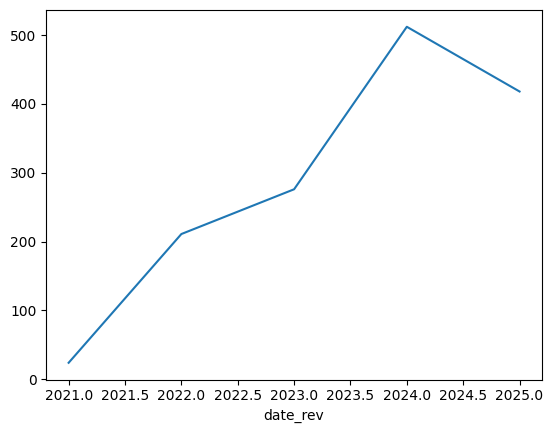

In [ ]:
df.date_rev.dt.year.value_counts().sort_index().plot() # number of reviews per year

In [ ]:
df.date_rev.dt.day_name().value_counts() # number of reviews per day of the week

,count
date_rev,
Thursday,272
Monday,251
Tuesday,239
Friday,218
Wednesday,217
Saturday,128
Sunday,116


<Axes: xlabel='date_rev'>

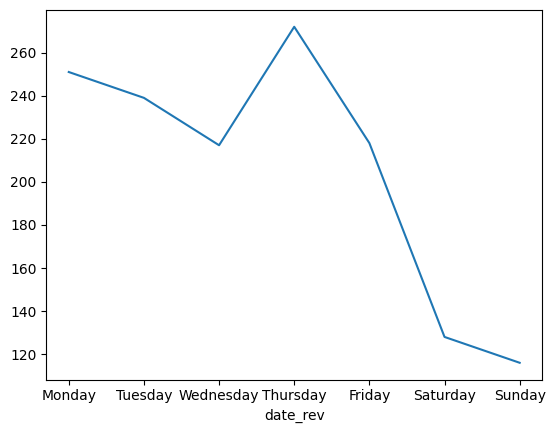

In [ ]:
df.date_rev.dt.day_name().value_counts()[list(calendar.day_name)].plot() # number of reviews per day of the week

In [ ]:
df.date_rev.dt.month.value_counts() # number of reviews per month

,count
date_rev,
1,168
8,164
7,150
3,148
2,133
4,115
6,112
12,100
5,93


<Axes: xlabel='date_rev'>

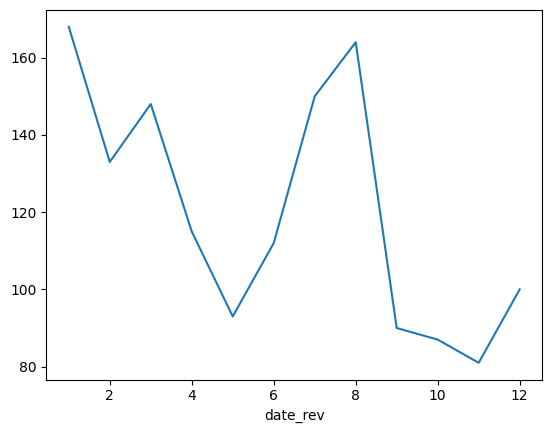

In [ ]:
df.date_rev.dt.month.value_counts().sort_index().plot() # number of reviews per month

# **4. Open AI API**
This part is in a separate file: see ABSA_pipeline.ipynb

# **5. Dataframe after ABSA**

In [5]:
f_absa = '/content/drive/MyDrive/Colab Notebooks/ABSA-summer-project/absa_aspects_flat.csv'
df_absa = pd.read_csv(f_absa)
df_absa.head()

,review_id,aspect_raw,aspect_normalized,category,code,sentiment
0,1,simple,Mobile app usability,Interface/Usability,INT_app,Positive
1,1,does what it must do,Mobile app usability,Interface/Usability,INT_app,Positive
2,2,Low fees,"Fees, spreads, commissions",Pricing,PRC_fee,Positive
3,2,easy to use,Mobile app usability,Interface/Usability,INT_app,Positive
4,3,All perfect great at all,Overall satisfaction,Overall Satisfaction,GEN,Positive


In [6]:
df_absa.loc[df_absa['review_id'] == 984]

,review_id,aspect_raw,aspect_normalized,category,code,sentiment
2694,984,User-friendly and easy to use app,Mobile app usability,Interface/Usability,INT_app,Positive
2695,984,The app is super user-friendly and easy to use.,Mobile app usability,Interface/Usability,INT_app,Positive
2696,984,"The top-up is simple and fast, I can connect any of my bank accounts and send money to my Lightyear account in a few sec.",Account setup & funding/withdrawals,Features Account,FTR_acc,Positive
2697,984,"my favorite feature is the repeat order, so I can use dollar cost averaging to buy my favorite ETFs on a regular basis.","Order types (market, limit, stop, etc.)",Trading Options,TRD_ord,Positive


In [7]:
f_cleaned = '/content/drive/MyDrive/Colab Notebooks/ABSA-summer-project/trustpilot_lightyear_cleaned.csv'
df_cleaned = pd.read_csv(f_cleaned)
df_cleaned.head()

,country,date_rev,rate,review,review_id
0,EE,2025-08-27 12:47:07+00:00,4,It simple and does what it must do.,1
1,EE,2025-08-26 22:11:39+00:00,5,"Low fees, easy to use",2
2,ES,2025-08-26 13:44:26+00:00,5,"All perfect great at all, hope its protected by european polices.",3
3,EE,2025-08-26 13:05:07+00:00,5,supper easy,4
4,IE,2025-08-26 03:39:54+00:00,5,Easy to use and everything you do is… | Easy to use and everything you do is well illustrated,5


In [8]:
df_merged = df_absa.merge(df_cleaned, on='review_id', how='left')
df_merged.head(20)

,review_id,aspect_raw,aspect_normalized,category,code,sentiment,country,date_rev,rate,review
0,1,simple,Mobile app usability,Interface/Usability,INT_app,Positive,EE,2025-08-27 12:47:07+00:00,4,It simple and does what it must do.
1,1,does what it must do,Mobile app usability,Interface/Usability,INT_app,Positive,EE,2025-08-27 12:47:07+00:00,4,It simple and does what it must do.
2,2,Low fees,"Fees, spreads, commissions",Pricing,PRC_fee,Positive,EE,2025-08-26 22:11:39+00:00,5,"Low fees, easy to use"
3,2,easy to use,Mobile app usability,Interface/Usability,INT_app,Positive,EE,2025-08-26 22:11:39+00:00,5,"Low fees, easy to use"
4,3,All perfect great at all,Overall satisfaction,Overall Satisfaction,GEN,Positive,ES,2025-08-26 13:44:26+00:00,5,"All perfect great at all, hope its protected by european polices."
5,3,hope its protected by european polices,Trust & brand reliability,Overall Satisfaction,GEN_trust,Neutral,ES,2025-08-26 13:44:26+00:00,5,"All perfect great at all, hope its protected by european polices."
6,4,supper easy,Mobile app usability,Interface/Usability,INT_app,Positive,EE,2025-08-26 13:05:07+00:00,5,supper easy
7,5,Easy to use,Mobile app usability,Interface/Usability,INT_app,Positive,IE,2025-08-26 03:39:54+00:00,5,Easy to use and everything you do is… | Easy to use and everything you do is well illustrated
8,5,everything you do is well illustrated,Design & aesthetics,Interface/Usability,INT_des,Positive,IE,2025-08-26 03:39:54+00:00,5,Easy to use and everything you do is… | Easy to use and everything you do is well illustrated
9,6,Amazing investments tool,Overall satisfaction,Overall Satisfaction,GEN,Positive,LT,2025-08-25 22:09:24+00:00,5,Amazing investments tool. | I'm using this to invest in ETFs to build a portfolio which will give my kids a solid investment for university or starting their own business when they will grow up.


In [9]:
df_merged.shape

(3985, 10)

# **6. Analysis**

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

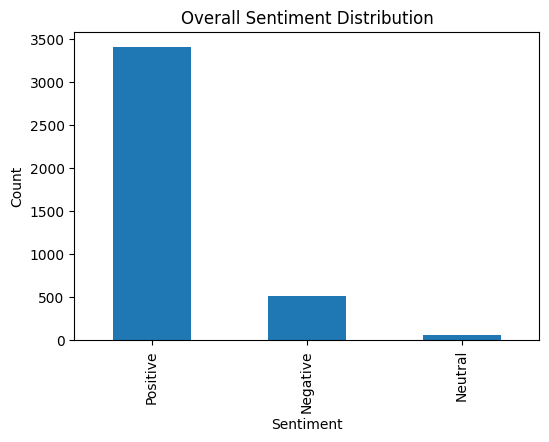

In [33]:
sentiment_counts = df_merged["sentiment"].value_counts()
sentiment_counts.plot(kind="bar", figsize=(6,4))
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

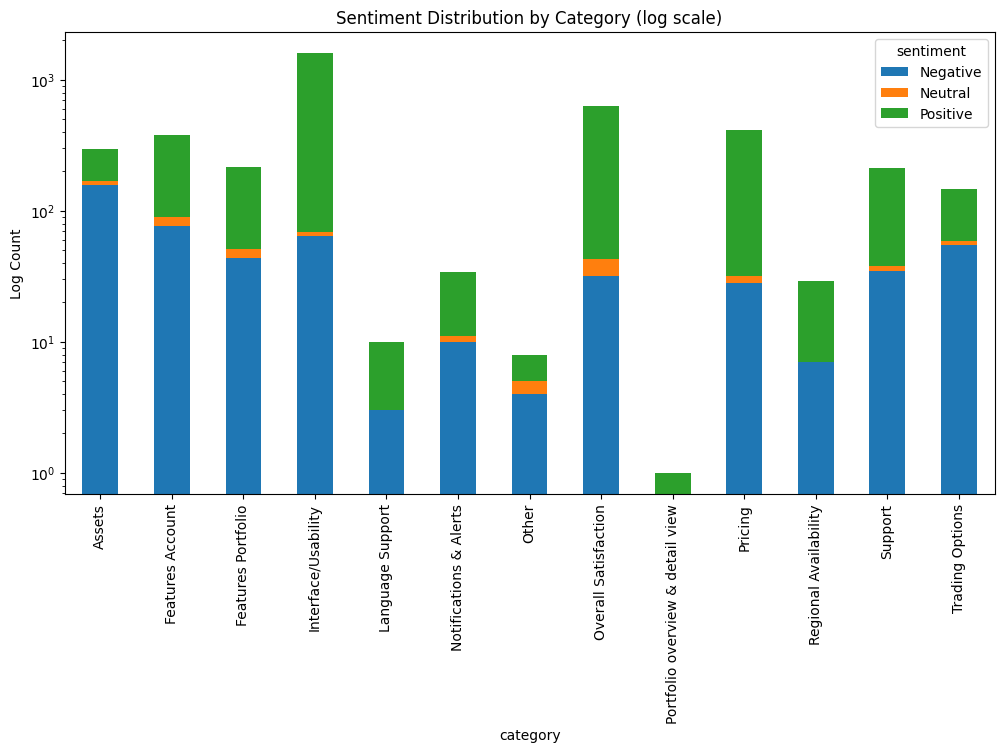

In [34]:
sentiment_by_cat.plot(kind="bar", stacked=True, figsize=(12,6))
plt.yscale("log")
plt.title("Sentiment Distribution by Category (log scale)")
plt.ylabel("Log Count")
plt.show()

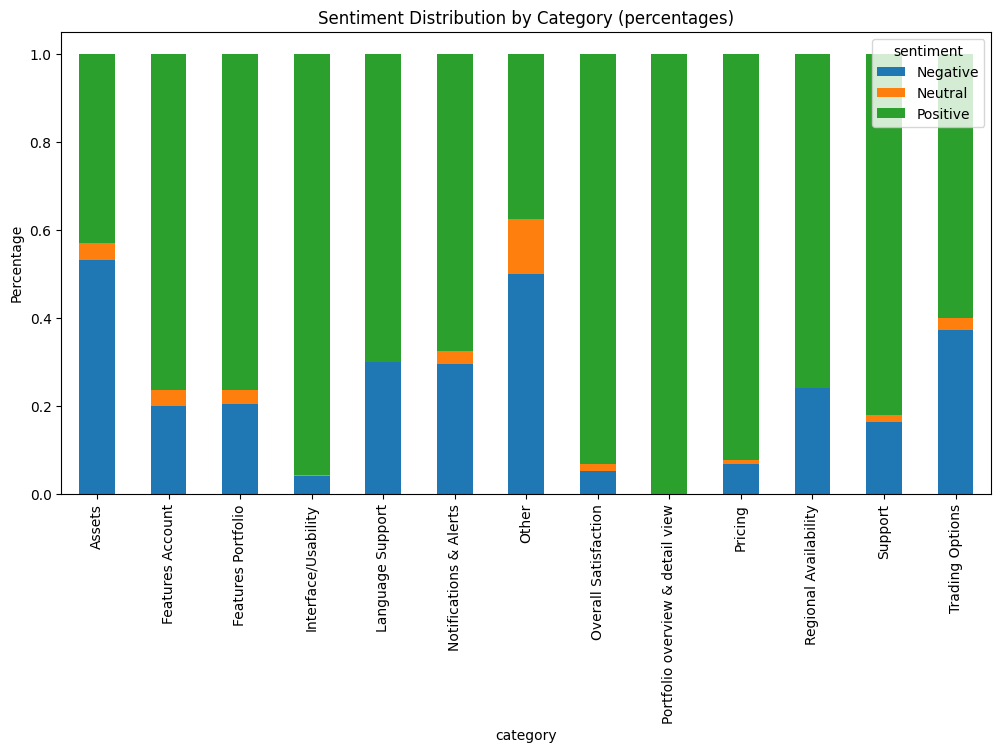

In [35]:
sentiment_by_cat_pct = sentiment_by_cat.div(sentiment_by_cat.sum(axis=1), axis=0)

sentiment_by_cat_pct.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Sentiment Distribution by Category (percentages)")
plt.ylabel("Percentage")
plt.show()

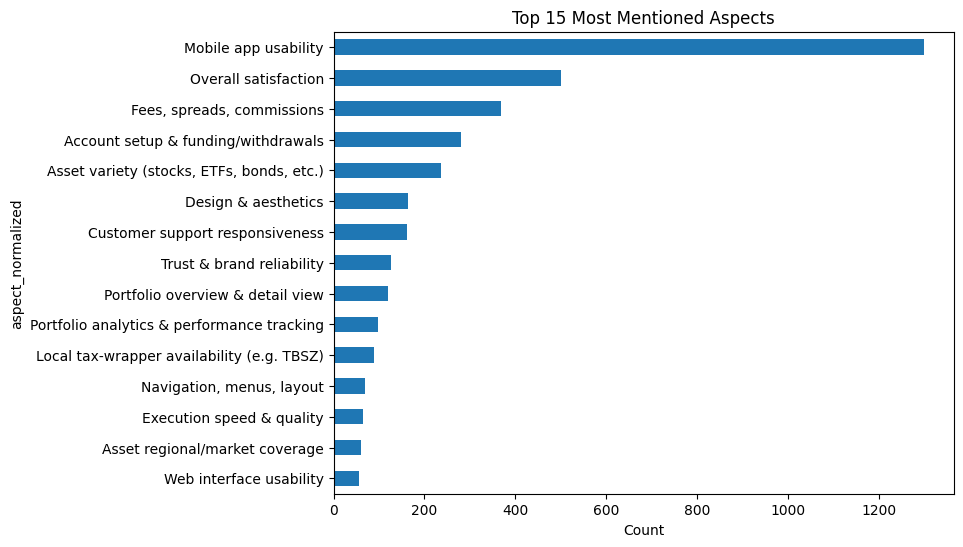

In [36]:
top_aspects = df_merged["aspect_normalized"].value_counts().head(15)
top_aspects.plot(kind="barh", figsize=(8,6))
plt.title("Top 15 Most Mentioned Aspects")
plt.xlabel("Count")
plt.gca().invert_yaxis()
plt.show()

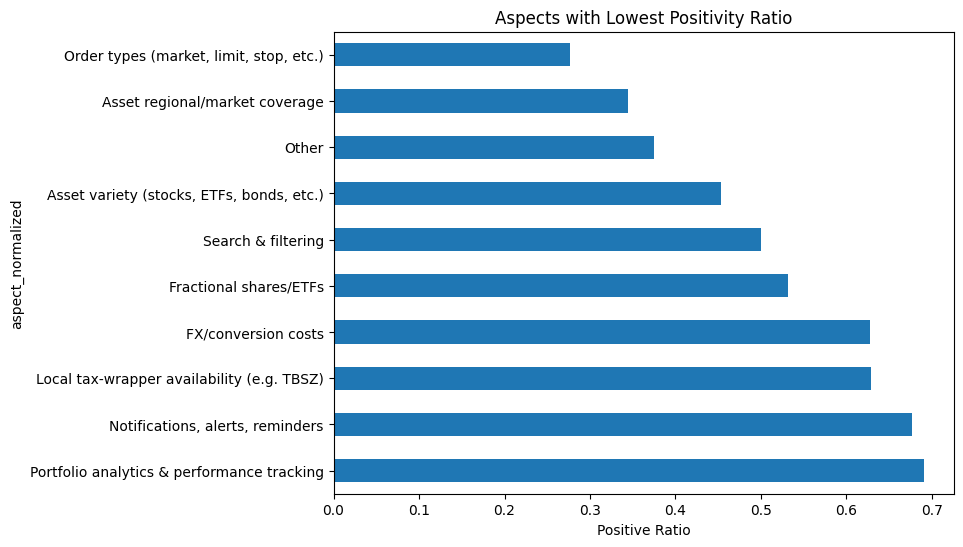

In [37]:
aspect_sentiment = df_merged.groupby(["aspect_normalized", "sentiment"]).size().unstack(fill_value=0)
aspect_sentiment["pos_ratio"] = aspect_sentiment["Positive"] / aspect_sentiment.sum(axis=1)

aspect_sentiment.sort_values("pos_ratio").head(10)["pos_ratio"].plot(kind="barh", figsize=(8,6))
plt.title("Aspects with Lowest Positivity Ratio")
plt.xlabel("Positive Ratio")
plt.gca().invert_yaxis()
plt.show()

/tmp/ipython-input-2132460240.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  trend = df_merged.groupby([pd.Grouper(key="date_rev", freq="M"), "sentiment"]).size().unstack(fill_value=0)


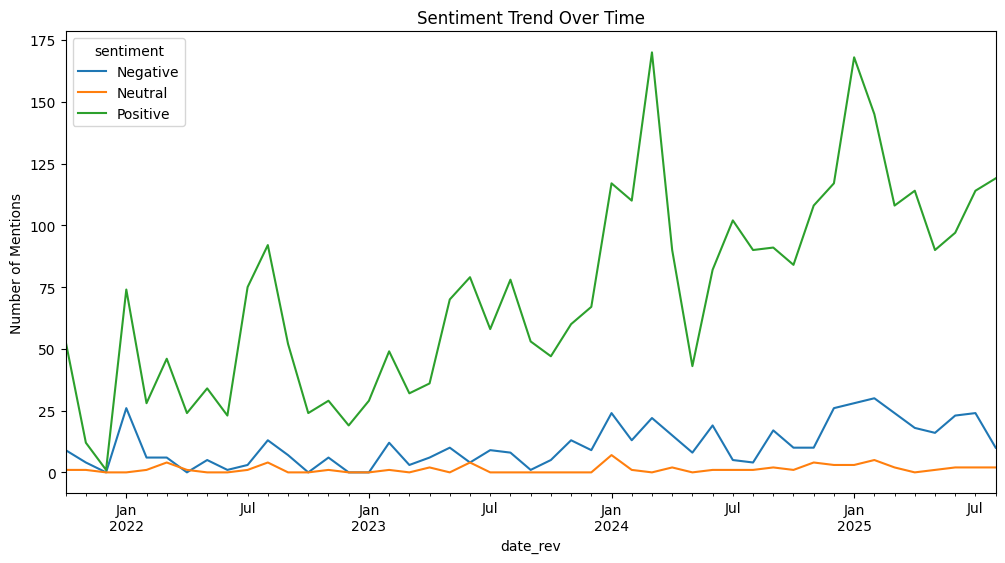

In [38]:
df_merged["date_rev"] = pd.to_datetime(df_merged["date_rev"], errors="coerce")

trend = df_merged.groupby([pd.Grouper(key="date_rev", freq="M"), "sentiment"]).size().unstack(fill_value=0)
trend.plot(kind="line", figsize=(12,6))
plt.title("Sentiment Trend Over Time")
plt.ylabel("Number of Mentions")
plt.show()

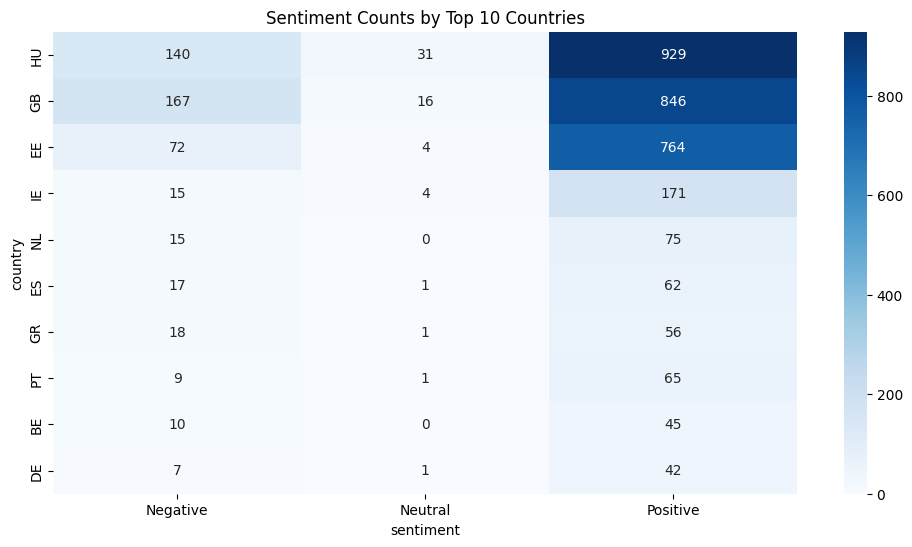

In [39]:
top_countries = country_sentiment.sum(axis=1).nlargest(10).index
plt.figure(figsize=(12,6))
sns.heatmap(country_sentiment.loc[top_countries], cmap="Blues", annot=True, fmt="d")
plt.title("Sentiment Counts by Top 10 Countries")
plt.show()